# Statistik und fitting!

In [2]:
!pip install numpy==1.26.4
!pip install pHcalc

Wir bauen uns ein Konzentrations über pH diagramm!

In [3]:
from pHcalc import Acid, Inert, System
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#wir nehmen als allererstes HCl welches komplett in wasser dissoziieren sollte!
# aus der dokumentation:  H3O+ and Cl-. Because H3O+ is adjusted internally, all you need to define is Cl-. 
# This implies a single equivalent of H3O+ in order to balance the charge of the system.
cl = Inert(charge=-1, conc=0.01)
system = System(cl)
system.pHsolve()
print(system.pH) # Should print 1.9999



1.9999977111816385


Warum ist das so? Was sagt der pH wert aus?

Aufgabe 1: Berechnen Sie alle pH Werte für alle Konzentrationen von HCl von $10^{-9}$ bis $1$ Mol/L und plotten Sie das Ergebnis. Die schritte sollten pro Dekade immer 10 Messpunkte haben!

In [5]:
np.array([1,2,3])*5

array([ 5, 10, 15])

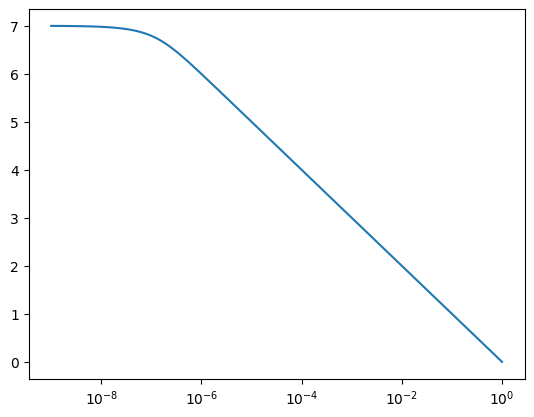

In [6]:
#ihr code hier
concli = np.geomspace(10**-9,1,100) 
pHli = []
for conc in concli:
    cl = Inert(charge=-1, conc=conc)
    system = System(cl)
    system.pHsolve()
    pHli.append(system.pH)

plt.semilogx(concli,pHli)

Nun das ganze mit NaOH

In [7]:
na = Inert(charge=1, conc=0.01)
system = System(na)
system.pHsolve()
print(system.pH) # Should print 12.00000

12.000002288818362


Titrieren sie nun $10^{-9}$ bis $1$ Mol/L NaOH und plotten sie den pH wert!

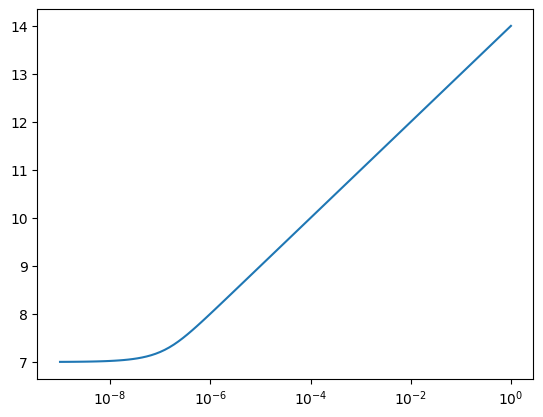

In [8]:
#ihr code hier
concli = np.geomspace(10**-9,1,100) 
pHli = []
for conc in concli:
    na = Inert(charge=1, conc=conc)
    system = System(na)
    system.pHsolve()
    pHli.append(system.pH)

plt.semilogx(concli,pHli)

Wie immer können wir auch gefährliche Dinge sehr easy im computer lösen!
Titrieren sie nun HF von $10^{-9}$ bis 1 Mol/L in 1000 Schritten.

2.6413261413574203


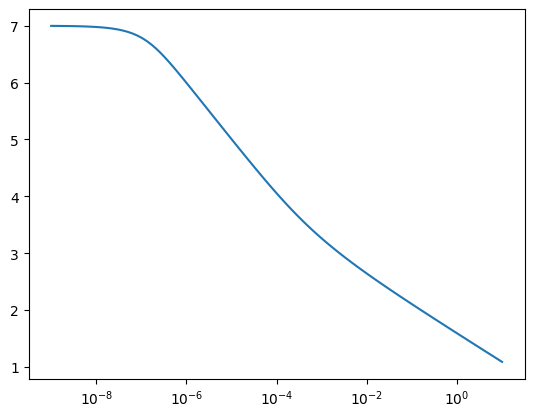

In [9]:
#Beispielcode
hf = Acid(Ka=6.76e-4, charge=0, conc=0.01)
# hf = Acid(pKa=3.17, charge=0, conc=0.01) will also work
system = System(hf)
system.pHsolve()
print(system.pH) # Should print 2.6413261

#ihr code hier
concli = np.geomspace(10**-9,10,100) 
pHli = []
for conc in concli:
    hf = Acid(Ka=6.76e-4, charge=0, conc=conc)
    system = System(hf)
    system.pHsolve()
    pHli.append(system.pH)

plt.semilogx(concli,pHli)

# Kompliziertes beispiel $(NH_4)_3PO_4$

8.95915298461914


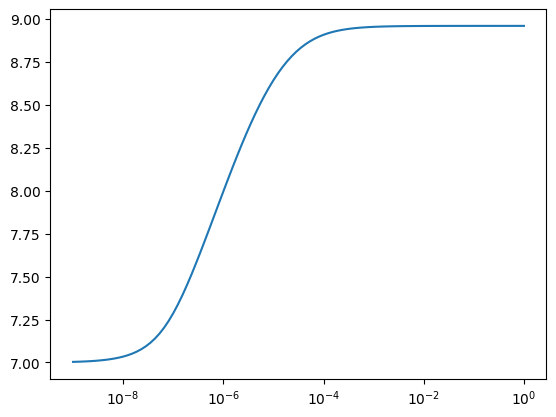

In [10]:
# Bitte ebenfalls von 10**-9 bis 1 plotten
phos = Acid(pKa=[2.148, 7.198, 12.319], charge=0, conc=0.01)
nh4 = Acid(pKa=9.25, charge=1, conc=0.01*3)
system = System(phos, nh4)
system.pHsolve()
print(system.pH) # Should print 8.95915298


#ihr code hier
concli = np.geomspace(10**-9,1,100) 
pHli = []
for conc in concli:
    phos = Acid(pKa=[2.148, 7.198, 12.319], charge=0, conc=conc)
    nh4 = Acid(pKa=9.25, charge=1, conc=conc*3)
    system = System(phos, nh4)
    system.pHsolve()
    pHli.append(system.pH)

plt.semilogx(concli,pHli)

# Finally Some Data Science!

Was wenn wir die pKa werte nicht wissen?

Wir nehmen mal an, dass die folgende Simulation eine Messung sei!

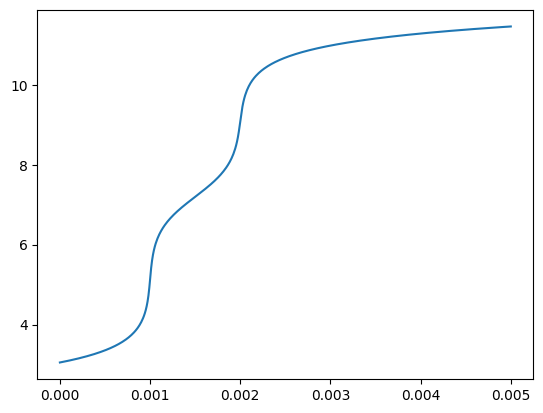

In [11]:
#  H3PO4 with NaOH aber linear!
na_moles = np.linspace(1e-8, 5.e-3, 500)
sol_volume = 1. # Liter
phos = Acid(pKa=[2.148, 7.198, 12.375], charge=0, conc=1.e-3)
phs = []
for mol in na_moles:
     na = Inert(charge=1, conc=mol/sol_volume)
     system = System(phos, na)
     system.pHsolve(guess_est=True)
     phs.append(system.pH)
plt.plot(na_moles, phs)
plt.show()

Messungen haben idR etwas Unsicherheit und daher Rauschen ... fügen wir das hinzu! 

In [12]:
phs_noise = np.array(phs) + np.random.normal(0,0.1,len(phs))

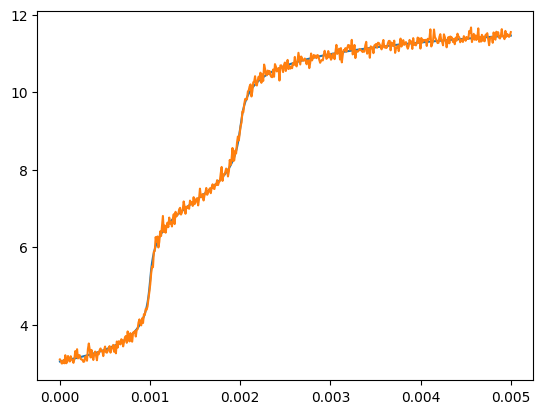

In [13]:
plt.plot(na_moles, phs)
plt.plot(na_moles, phs_noise)
plt.show()

Plotten Sie als histogramm nun nur den Fehler aus der "perfekten" simlation und unserer "fake messung" welche verrauscht ist.

Berechnen Sie den MSE, MAE, R2, Fehlervarianz und den Absoluten Fehler

0.010754002985166872
0.08106178505998538
0.9773492582680576


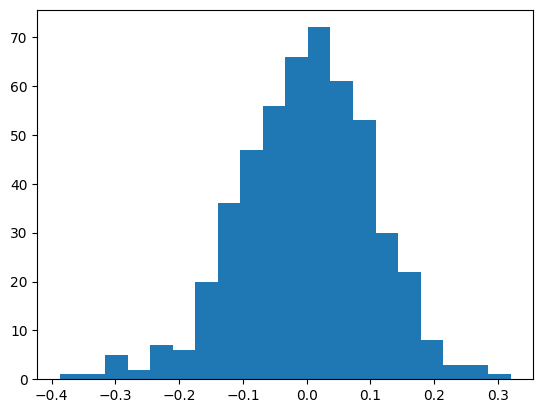

In [14]:
#die differenz als histogramm plotten

diff = np.array(phs)-np.array(phs_noise)

_ = plt.hist(diff,20)

mse = np.mean(diff**2)
print(mse)
mae = np.mean(np.abs(diff))
print(mae)

r2 = 1-np.mean(diff**2/(phs-np.mean(phs))**2)
print(r2)

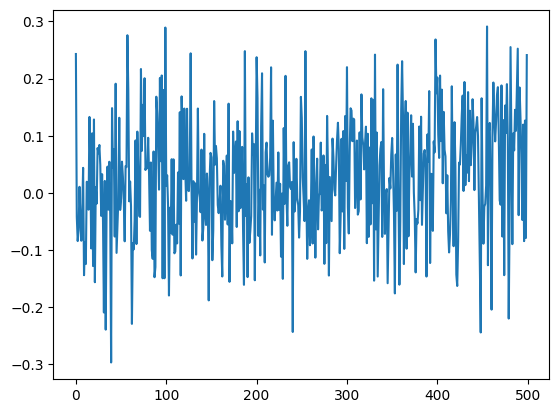

In [15]:
fehler = np.random.normal(0,0.1,len(phs))+na_moles*10
plt.plot(fehler)

Wie könnten wir die pKa/pkS werte herausfinden wenn wir nun wirklich eine Messung vorliegen hätten?
Ausprobieren?
Fitten!

Schreiben Sie zunächst eine funktion welche den pH berechner wenn eine liste von länge 3 übergeben wird

Hier ist ein Beispielcode zum fitten mittels scipy optimize minimize:

In [16]:
import numpy as np
from scipy.optimize import minimize

# Definiere die Zielfunktion, die Sie minimieren möchten
def objective_function(params):
    x, y = params
    # Beispiel: Quadratische Funktion (ersetze sie durch deine Funktion)
    return (x - 2)**2 + (y - 3)**2

# Setze die Startwerte für die Parameter
initial_guess = [0.0, 0.0]

# Optional: Definiere Nebenbedingungen (Gleichungen oder Ungleichungen)
#constraints = [
#    # Beispiel für eine Gleichung: x + y + z = 1
#    {'type': 'eq', 'fun': lambda params: params[0] + params[1] - 1}
#]

bounds = [
    (None, None),  # Keine Grenze für x
    (0, None),     # y ≥ 0
]

# Führe die Optimierung durch
result = minimize(
    objective_function,
    initial_guess,
    method='SLSQP',  # Ändere den Algorithmus, falls erforderlich
    bounds=bounds#,
    #constraints=constraints
)

if result.success:
    print("Optimierung erfolgreich!")
    print("Optimale Parameter:", result.x)
else:
    print("Optimierung fehlgeschlagen:", result.message)

print("Minimaler Wert der Zielfunktion:", result.fun)


Optimierung erfolgreich!
Optimale Parameter: [2. 3.]
Minimaler Wert der Zielfunktion: 0.0


In [17]:
# wir schreiben das nun mit dem MSE i.e. wenn wir eine weitere funktion anfitten wollen würden


(-7.723067766667625, 11.94502302489117, 0.3261806589707979, 7.052422885483674)

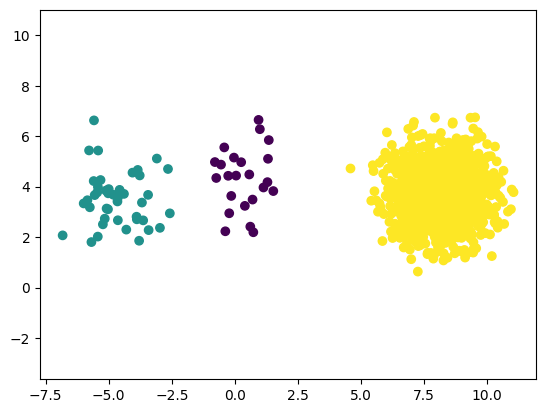

In [18]:
# make datasets und intro sklearn
from sklearn.datasets import make_classification,make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=[23,42,1337],random_state=80)
plt.scatter(X[:,0],X[:,1],c=y)
plt.axis('equal')

In [19]:
# We will do some simple act
import numpy as np

def schwefel(x):
    """
    Schwefel function implementation.
    
    Parameters:
    x (array-like): Input array of variables.

    Returns:
    float: Schwefel function value at x.
    """
    x = np.asarray(x)
    n = len(x)
    return 418.9829 * n - np.sum(x * np.sin(np.sqrt(np.abs(x))))


x = [420.9687, 420.9687]  # Global minimum for two variables
result = schwefel(x)
print(f"Schwefel function value at {x}: {result}")

Schwefel function value at [420.9687, 420.9687]: 2.545567497236334e-05


In [20]:
#download data from: https://citrination.com/datasets/150128/show_files/
import json
path = "/home/mmr/how-to-python/Computerscience and Programming 24/VL_21.01.25/fega_formatted.json"
data = json.load(open(path,'r'))

In [21]:
#Wrange with compositions

# Initialize arrays
Fe_at_percent = []
Ga_at_percent = []
Pd_at_percent = []
xrd_patterns = []
# Extract composition

# Loop through the composition
for d in data:
    cmp = d['composition']
    for entry in cmp:
        if entry['element'] == 'Fe':
            Fe_at_percent.append(float(entry['actualAtomicPercent']['value']))
        elif entry['element']  == 'Ga':
            Ga_at_percent.append(float(entry['actualAtomicPercent']['value']))
        elif entry['element']  == 'Pd':
            Pd_at_percent.append(float(entry['actualAtomicPercent']['value']))
    xrd = [float(q['value']) for q in d['properties'][3]['scalars']]
    xrd_patterns.append(xrd)
angle = [float(q['value']) for q in d['properties'][3]['conditions'][0]['scalars']]
xrd_patterns = np.array(xrd_patterns).T

Text(0.5, 0, 'Angle [deg]')

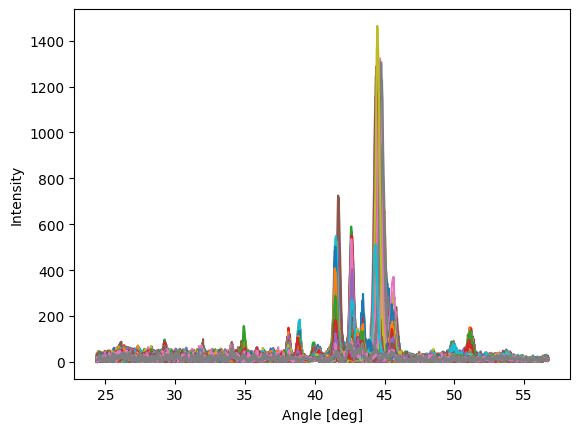

In [22]:
_ = plt.plot(angle,xrd_patterns)
plt.ylabel('Intensity')
plt.xlabel('Angle [deg]')

Text(0, 0.5, 'Intensity')

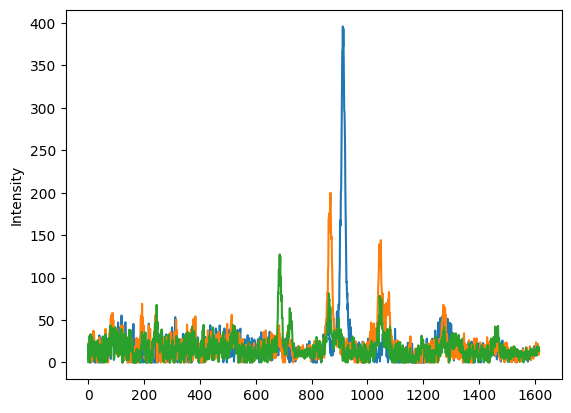

In [23]:
_ = plt.plot(xrd_patterns[:, 42])
_ = plt.plot(xrd_patterns[:, 158])
_ = plt.plot(xrd_patterns[:, 202])
plt.ylabel("Intensity")

In [24]:
#plot compositions
import matplotlib.pyplot as plt
import numpy as np
def ternary_to_cartesian(Fe, Ga, Pd):
    # Ternary coordinates (Fe, Ga, Pd) -> Cartesian (x, y)
    x = 0.5 * (2 * Ga + Pd) / 100
    y = (np.sqrt(3) / 2) * Pd / 100
    return [x, y]

points = np.array([ternary_to_cartesian(Fe, Ga, Pd) for Fe, Ga, Pd in zip(Fe_at_percent, Ga_at_percent, Pd_at_percent)])

# Draw triangle edges
triangle_x = [0, 1, 0.5, 0]
triangle_y = [0, 0, np.sqrt(3) / 2, 0]

Text(0.5, 0.9160254037844386, 'Pd')

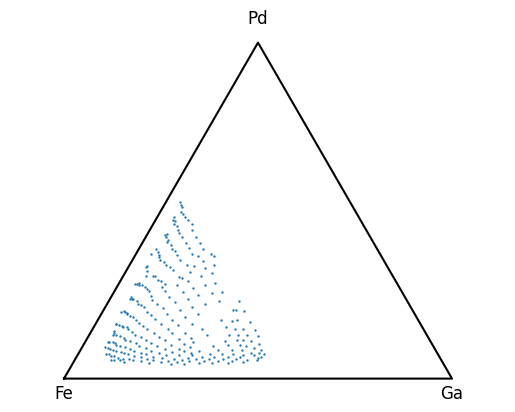

In [25]:
plt.plot(triangle_x,triangle_y,c='black')
plt.scatter(points[:,0],points[:,1], s=0.5) # s=... changes dot size
plt.axis('equal')
plt.axis('off')
plt.text(0, -0.05, "Fe", ha='center', fontsize=12)
plt.text(1, -0.05, "Ga", ha='center', fontsize=12)
plt.text(0.5, np.sqrt(3) / 2 + 0.05, "Pd", ha='center', fontsize=12)

In [26]:
#we use PCA to visualize the XRD landscape
from sklearn.decomposition import PCA
myPCA = PCA(n_components=2)
pcs = myPCA.fit_transform(xrd_patterns.T)

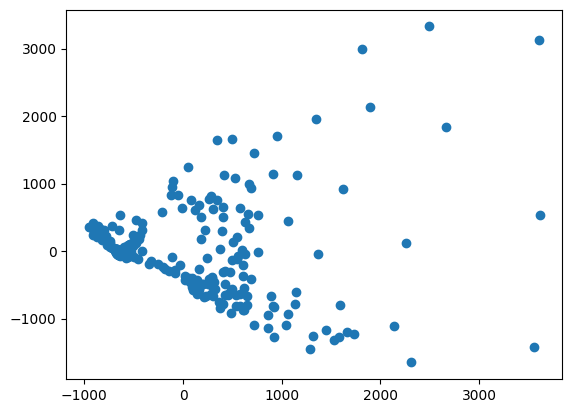

In [27]:
plt.scatter(pcs[:,0], pcs[:,1])

In [28]:
from sklearn.manifold import MDS
my_MDS = MDS(n_components=2)
mds = my_MDS.fit_transform(xrd_patterns.T)

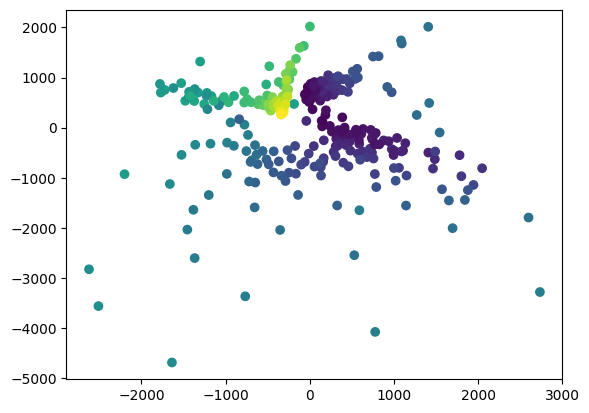

In [29]:
plt.scatter(mds[:,0], mds[:,1], c=Ga_at_percent) # c=Pd_at_percent or c=Fe_at_percent

In [30]:
#we use K-means to cluster XRD patterns
#first we show this on the PCA scatter plot and then we show it on the ternary diagram


In [35]:
#now we use nnmf
from sklearn.decomposition import NMF
model = NMF(n_components=9, init='random', random_state=0)

W = model.fit_transform(xrd_patterns)
H = model.components_

(9, 278)


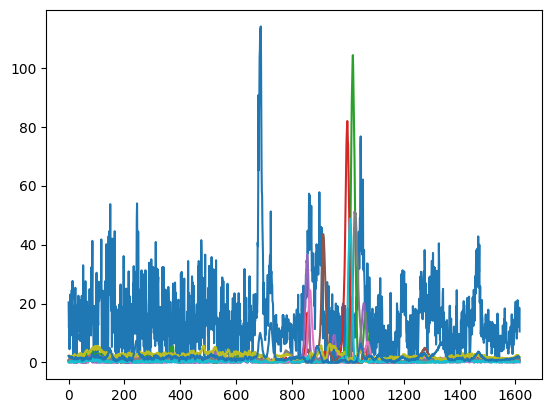

In [36]:
#plot some intensity of a phase over the ternary diagram as shown below!
k = 200
plt.plot(xrd_patterns[:,k])
plt.plot(np.sum(W*H[0,k]))
plt.plot(W)
print(H.shape)

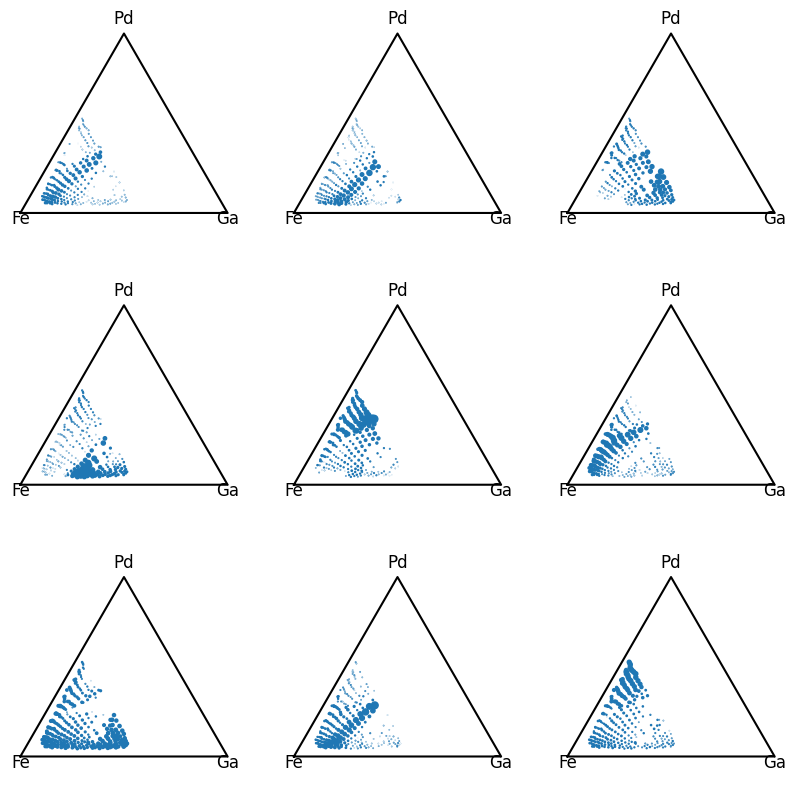

In [40]:
fix, ax = plt.subplots(3,3, figsize=(10,10))
ax = ax.flatten()
for i,a in enumerate(ax):
    a.plot(triangle_x,triangle_y,c='black')
    a.scatter(points[:,0],points[:,1], s=H[i,:]) # s=... changes dot size
    a.axis('equal')
    a.axis('off')
    a.text(0, -0.05, "Fe", ha='center', fontsize=12)
    a.text(1, -0.05, "Ga", ha='center', fontsize=12)
    a.text(0.5, np.sqrt(3) / 2 + 0.05, "Pd", ha='center', fontsize=12)